In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()


In [3]:
# First look in to the data size
useducation_df.shape

(1492, 25)

In [4]:
useducation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

**Tasks**
1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.


In [5]:
# zero revenue in "STATE_REVENUE" is missing data
useducation_df=useducation_df.replace(0, np.nan)
# Replace 'VI', 'U.S._VIRGIN_ISLANDS', as 'VIRGIN_ISLAND'
useducation_df=useducation_df.replace({'VI':'VIRGIN_ISLANDS', 'U.S._VIRGIN_ISLANDS':'VIRGIN_ISLANDS', \
                                       'AS': 'AMERICAN_SAMOA', 'BI':'BUREAU_OF_INDIAN_AFFAIRS', \
                                       'BUREAU_OF_INDIAN_EDUCATIO':'BUREAU_OF_INDIAN_AFFAIRS', \
                                       'BUREAU_OF_INDIAN_EDUCATION': 'BUREAU_OF_INDIAN_AFFAIRS', \
                                       'BIE':'BUREAU_OF_INDIAN_AFFAIRS', \
                                       'DD': 'DEPARTMENT_OF_DEFENSE', \
                                       'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY':'DEPARTMENT_OF_DEFENSE', \
                                       '^DOD.*$':'DEPARTMENT_OF_DEFENSE', \
                                       'GU':'GUAM', 'NORTHERN_MARIANAS':'NORTHERN_MARIANA_ISLANDS', \
                                       'PR':'PUERTO_RICO', 'COMMONWEALTH_OF_MARIANAS':'MARIANAS'})

useducation_df.loc[useducation_df['STATE'].str.contains('DOD'),'STATE']='DEPARTMENT_OF_DEFENSE'


In [6]:
# show replications
display(useducation_df[useducation_df.PRIMARY_KEY.duplicated(keep='first')])

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
841,2008_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2008,58191.0,1224312.0,85568.0,NaN,1138744.0,1224785.0,520090.0,...,3292.0,2936.0,2092.0,26249.0,10315.0,36676.0,NaN,NaN,NaN,NaN
880,2008_VIRGINIA,VIRGINIA,2008,1230857.0,14768120.0,897627.0,5957786.0,7912707.0,15236306.0,8003167.0,...,4666.0,3863.0,2535.0,36807.0,12837.0,51345.0,NaN,NaN,NaN,NaN
882,2008_VIRGINIA,VIRGINIA,2008,1230857.0,14768120.0,897627.0,5957786.0,7912707.0,15236306.0,8003167.0,...,2548.0,1485.0,484.0,19226.0,2758.0,24554.0,NaN,NaN,NaN,NaN
896,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2009,44331.0,801008.0,75856.0,NaN,725152.0,805362.0,330698.0,...,3423.0,2860.0,2188.0,26762.0,9970.0,36823.0,219.260141,253.595187,201.984638,252.631381
949,2010_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2010,43866.0,1195934.0,80585.0,NaN,1115349.0,1290048.0,526469.0,...,3397.0,2992.0,2203.0,27264.0,9977.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# drop replications
useducation_df.drop_duplicates(subset='PRIMARY_KEY', inplace= True)

In [8]:
# Missing value is replaced by the mean value in that year
column_list = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE', \
               'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE', \
               'CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G', 'GRADES_12_G', \
               'GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', \
               'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

useducation3_df=useducation_df.copy()
years = useducation3_df.YEAR.unique()



for column in column_list:
    for year in years:
        useducation3_df.loc[useducation3_df.YEAR==year, column].fillna( \
            useducation3_df[useducation3_df.YEAR==year][column].mean(), inplace=True)

In [9]:
useducation3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1487 non-null object
STATE                           1487 non-null object
YEAR                            1487 non-null int64
ENROLL                          1224 non-null float64
TOTAL_REVENUE                   1275 non-null float64
FEDERAL_REVENUE                 1275 non-null float64
STATE_REVENUE                   1250 non-null float64
LOCAL_REVENUE                   1275 non-null float64
TOTAL_EXPENDITURE               1275 non-null float64
INSTRUCTION_EXPENDITURE         1275 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1275 non-null float64
OTHER_EXPENDITURE               1224 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1275 non-null float64
GRADES_PK_G                     1313 non-null float64
GRADES_KG_G                     1355 non-null float64
GRADES_4_G                      1356 non-null float64
GRADES_8_G                      1

# Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [10]:
useducation3_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1487.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.250000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1356.000000,1356.000000,1356.000000,1.356000e+03,1.356000e+03,1.315000e+03,535.000000,531.000000,532.000000,497.000000
mean,2004.419637,9.175416e+05,9.102045e+06,7.677799e+05,4.308218e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,64764.125369,64497.620206,54462.023599,5.210280e+05,2.479486e+05,8.047688e+05,234.797280,278.461453,218.897886,263.683325
std,7.402309,1.066514e+06,1.175962e+07,1.146992e+06,5.572415e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,80355.470045,78967.505589,67939.693855,6.441294e+05,3.079326e+05,9.712596e+05,10.209002,10.111886,7.742281,6.792513
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,8.361300e+04,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.232924e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,13895.250000,13530.750000,11047.250000,1.116368e+05,5.230775e+04,1.837415e+05,229.752478,272.765806,214.741150,259.547225
50%,2004.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.593563e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,43434.000000,43550.000000,36830.500000,3.480880e+05,1.658580e+05,5.547770e+05,237.264821,280.619538,220.442392,265.022859
75%,2011.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.190068e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,75560.500000,76691.750000,67488.250000,6.120588e+05,2.912305e+05,9.298230e+05,242.000056,285.411348,224.005309,268.197443
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


1. Since we did not process the outliers, the std can be huge in TOTAL_REVENUE and TOTAL_EXPENDITURE.
2. TOTAL_EXPENDITURE is greater than TOTAL_REVENUE, meaning on average the states are running on budget deficit. 


# Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [11]:
# Pick california
education_CA=useducation3_df[useducation3_df['STATE']=='CALIFORNIA']

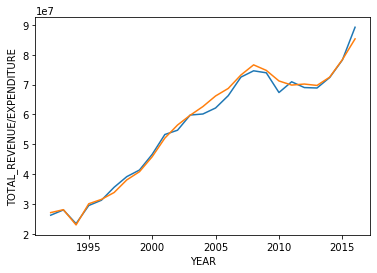

In [12]:
ax = sns.lineplot(x='YEAR', y='TOTAL_REVENUE', data=education_CA)
ax = sns.lineplot(x='YEAR', y='TOTAL_EXPENDITURE', data=education_CA)
plt.ylabel('TOTAL_REVENUE/EXPENDITURE')
plt.show()

In general the revenue and expenditure in California grows in years.  The decreases in the 1994, and 2009-2013 in both revenue and expenditure match the financial crisis at the time. 

# In your chosen state, which of the lessons are the students more successful, math or reading?

In [13]:
score_list= ['YEAR', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
math_reading_score_CA = education_CA.loc[:,score_list]
math_reading_score_CA.describe()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,11.000000,11.000000,11.000000,10.000000
mean,2004.500000,225.659625,269.355244,207.911547,261.902652
std,7.648529,10.063398,5.638743,5.363399,4.861743
min,1992.000000,208.398961,260.892247,196.764414,254.895247
25%,1998.250000,220.510053,264.910990,205.774512,259.188273
50%,2004.500000,230.366957,270.381784,208.522186,261.902941
75%,2010.750000,231.968934,274.047188,211.952302,264.416677
max,2017.000000,234.164993,276.638200,215.421814,269.197451


In general the math score in California is higher than reading score in both 4th and 8th grade. Math is more successful. 

# What are the distributions of the math and reading scores in the sample?

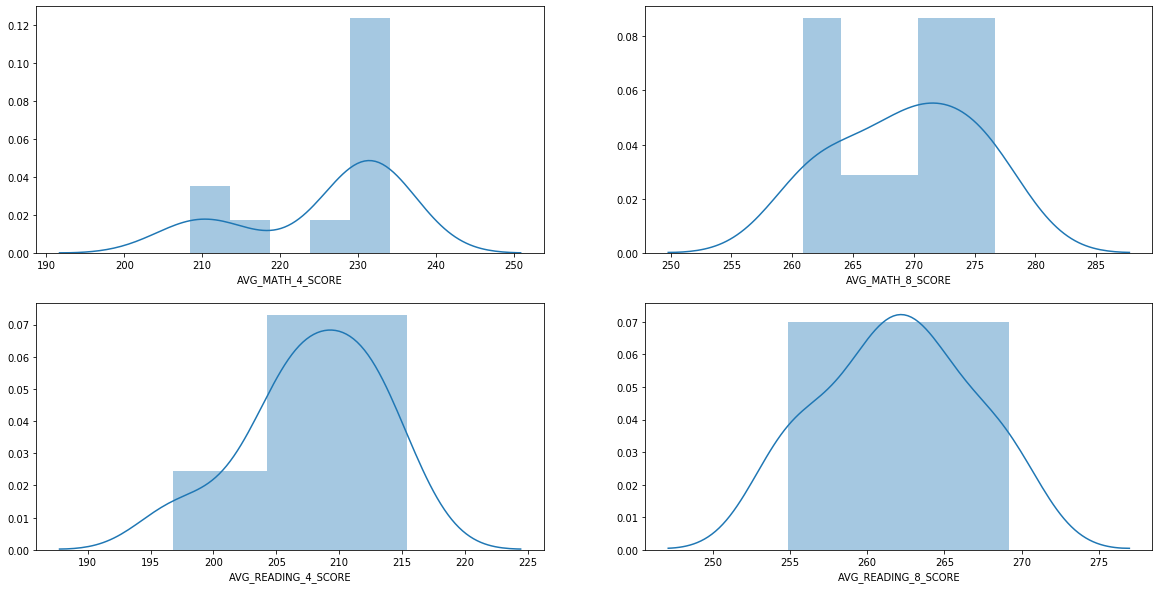

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(math_reading_score_CA.AVG_MATH_4_SCORE, bins=5)

plt.subplot(2,2,2)
sns.distplot(math_reading_score_CA.AVG_MATH_8_SCORE, bins=5)

plt.subplot(2,2,3)
sns.distplot(math_reading_score_CA.AVG_READING_4_SCORE, bins=5)

plt.subplot(2,2,4)
sns.distplot(math_reading_score_CA.AVG_READING_8_SCORE, bins=5)


plt.show()

The sample size is too small (n=10) to show meaningful distribution pattern.  

# Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992,208.398961,260.892247,196.764414,NaN
56,1993,NaN,NaN,NaN,NaN
108,1994,NaN,NaN,NaN,NaN
161,1995,NaN,NaN,NaN,NaN
213,1996,209.129083,262.772478,201.912591,269.197451
264,1997,NaN,NaN,NaN,NaN
316,1998,NaN,NaN,NaN,NaN
367,1999,NaN,NaN,NaN,NaN
420,2000,213.565125,262.171027,205.916588,264.494066
472,2001,NaN,NaN,NaN,NaN


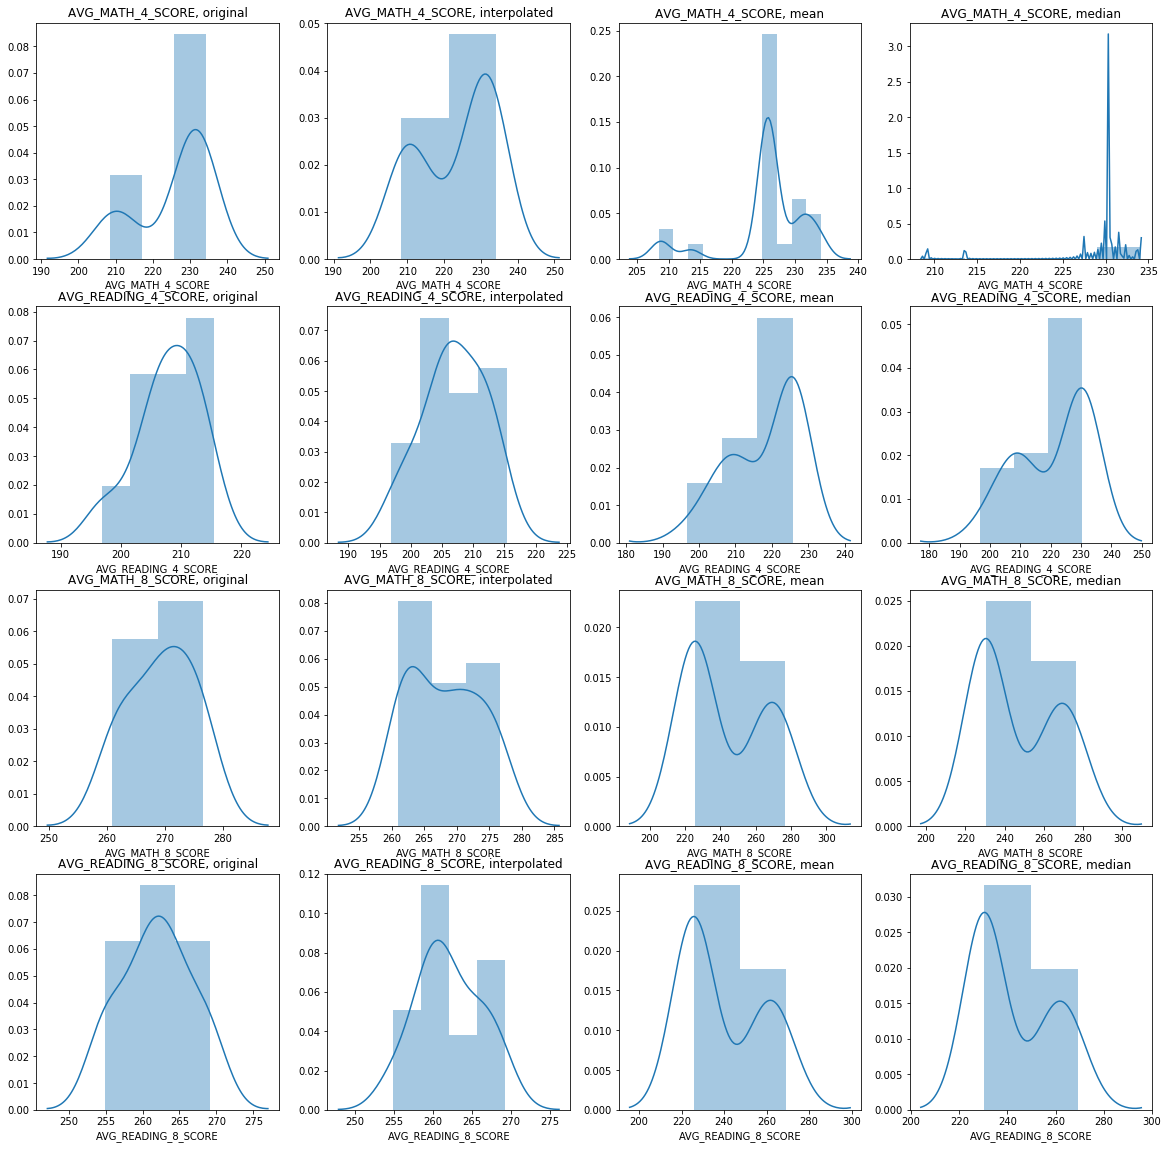

In [21]:
math_reading_score_CA = education_CA.loc[:,score_list]

display(math_reading_score_CA)

plt.figure(figsize=(20,20))

plt.subplot(4, 4, 1)
plt.title('AVG_MATH_4_SCORE, original')
sns.distplot(math_reading_score_CA.AVG_MATH_4_SCORE.dropna())

plt.subplot(4, 4, 2)
plt.title('AVG_MATH_4_SCORE, interpolated')
sns.distplot(math_reading_score_CA.AVG_MATH_4_SCORE.interpolate())

plt.subplot(4, 4, 3)
plt.title('AVG_MATH_4_SCORE, mean')
sns.distplot(math_reading_score_CA.AVG_MATH_4_SCORE.fillna(math_reading_score_CA.AVG_MATH_4_SCORE.mean()))

plt.subplot(4, 4, 4)
plt.title('AVG_MATH_4_SCORE, median')
sns.distplot(math_reading_score_CA.AVG_MATH_4_SCORE.fillna(math_reading_score_CA.AVG_MATH_4_SCORE.median()))


plt.subplot(4, 4, 5)
plt.title('AVG_READING_4_SCORE, original')
sns.distplot(math_reading_score_CA.AVG_READING_4_SCORE.dropna())

plt.subplot(4, 4, 6)
plt.title('AVG_READING_4_SCORE, interpolated')
sns.distplot(math_reading_score_CA.AVG_READING_4_SCORE.interpolate())

plt.subplot(4, 4, 7)
plt.title('AVG_READING_4_SCORE, mean')
sns.distplot(math_reading_score_CA.AVG_READING_4_SCORE.fillna(math_reading_score_CA.AVG_MATH_4_SCORE.mean()))

plt.subplot(4, 4, 8)
plt.title('AVG_READING_4_SCORE, median')
sns.distplot(math_reading_score_CA.AVG_READING_4_SCORE.fillna(math_reading_score_CA.AVG_MATH_4_SCORE.median()))

plt.subplot(4, 4, 9)
plt.title('AVG_MATH_8_SCORE, original')
sns.distplot(math_reading_score_CA.AVG_MATH_8_SCORE.dropna())

plt.subplot(4, 4, 10)
plt.title('AVG_MATH_8_SCORE, interpolated')
sns.distplot(math_reading_score_CA.AVG_MATH_8_SCORE.interpolate())

plt.subplot(4, 4, 11)
plt.title('AVG_MATH_8_SCORE, mean')
sns.distplot(math_reading_score_CA.AVG_MATH_8_SCORE.fillna(math_reading_score_CA.AVG_MATH_4_SCORE.mean()))

plt.subplot(4, 4, 12)
plt.title('AVG_MATH_8_SCORE, median')
sns.distplot(math_reading_score_CA.AVG_MATH_8_SCORE.fillna(math_reading_score_CA.AVG_MATH_4_SCORE.median()))


plt.subplot(4, 4, 13)
plt.title('AVG_READING_8_SCORE, original')
sns.distplot(math_reading_score_CA.AVG_READING_8_SCORE.dropna())

plt.subplot(4, 4, 14)
plt.title('AVG_READING_8_SCORE, interpolated')
sns.distplot(math_reading_score_CA.AVG_READING_8_SCORE.interpolate().dropna())

plt.subplot(4, 4, 15)
plt.title('AVG_READING_8_SCORE, mean')
sns.distplot(math_reading_score_CA.AVG_READING_8_SCORE.fillna(math_reading_score_CA.AVG_MATH_4_SCORE.mean()))

plt.subplot(4, 4, 16)
plt.title('AVG_READING_8_SCORE, median')
sns.distplot(math_reading_score_CA.AVG_READING_8_SCORE.fillna(math_reading_score_CA.AVG_MATH_4_SCORE.median()))



plt.show()

It is not a desirable situation to have only 10 data points and to use these 10 data points to interpolate (replace) the missing data.  It is a good exercise to use these techniques.  However there is no "distribution" in 10 data points.  